# Mix dataframes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We upload the 3 data frames that we have: one with graph's properties, one with historical stats of each team, and one with the historical encounters between each pair of teams
df_graph_properties=pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/df_historical_graph_properties.csv')
df_history = pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/history_teams_matchid')
df_pair = pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/pair_history_df')

In [ ]:
df_graph_properties.head()

,match_id,home_team,away_team,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,away_density_3,away_transitivity_1,away_transitivity_2,away_transitivity_3,away_average_clustering_1,away_average_clustering_2,away_average_clustering_3,away_diameter_1,away_diameter_2,away_diameter_3
0,3888713,Real Madrid,Barcelona,away_team_winner,3.50,2.00,6.36,0.24,2.85,2.00,...,2.89,5.51,5.51,5.51,0.18,0.18,0.18,2.08,2.08,2.08
1,68353,Espanyol,Barcelona,away_team_winner,1.42,2.00,3.37,0.29,2.92,2.00,...,2.89,5.11,5.51,5.51,0.24,0.18,0.18,2.00,2.08,2.08
2,68313,Barcelona,Osasuna,home_team_winner,2.47,2.00,4.24,0.16,1.59,2.00,...,2.89,5.51,5.51,5.51,0.18,0.18,0.18,2.08,2.08,2.08
3,68314,Barcelona,Málaga,home_team_winner,4.10,2.00,6.91,0.13,1.46,2.00,...,2.89,5.51,5.51,5.51,0.18,0.18,0.18,2.08,2.08,2.08
4,69153,Albacete,Barcelona,away_team_winner,1.90,3.00,4.27,0.12,2.16,3.00,...,2.89,5.70,5.11,5.51,0.19,0.24,0.18,2.00,2.00,2.08


In [ ]:
df_history.head()

,match_id,winning_history_home,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away
0,3888713,0.33,0.33,0.33,0.33,0.33,0.33,1.52,1.50
1,68353,0.33,1.00,0.33,0.00,0.33,0.00,1.52,5.00
2,68313,1.00,0.33,0.00,0.33,0.00,0.33,3.00,1.50
3,68314,1.00,0.33,0.00,0.33,0.00,0.33,3.00,1.50
4,69153,0.33,1.00,0.33,0.00,0.33,0.00,1.52,3.25


In [ ]:
df_pair.head()

,match_id,home_team,away_team,pair_win_home,pair_win_away,pair_tie
0,3888713,Real Madrid,Barcelona,0.33,0.33,0.33
1,68353,Espanyol,Barcelona,0.33,0.33,0.33
2,68313,Barcelona,Osasuna,0.33,0.33,0.33
3,68314,Barcelona,Málaga,0.33,0.33,0.33
4,69153,Albacete,Barcelona,0.33,0.33,0.33


In [ ]:
# We first merge the 2 first datasets
merge_1 = pd.merge(df_graph_properties, df_history, on='match_id', how='left')

In [ ]:
merge_1.head()

,match_id,home_team,away_team,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,away_diameter_2,away_diameter_3,winning_history_home,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away
0,3888713,Real Madrid,Barcelona,away_team_winner,3.50,2.00,6.36,0.24,2.85,2.00,...,2.08,2.08,0.33,0.33,0.33,0.33,0.33,0.33,1.52,1.50
1,68353,Espanyol,Barcelona,away_team_winner,1.42,2.00,3.37,0.29,2.92,2.00,...,2.08,2.08,0.33,1.00,0.33,0.00,0.33,0.00,1.52,5.00
2,68313,Barcelona,Osasuna,home_team_winner,2.47,2.00,4.24,0.16,1.59,2.00,...,2.08,2.08,1.00,0.33,0.00,0.33,0.00,0.33,3.00,1.50
3,68314,Barcelona,Málaga,home_team_winner,4.10,2.00,6.91,0.13,1.46,2.00,...,2.08,2.08,1.00,0.33,0.00,0.33,0.00,0.33,3.00,1.50
4,69153,Albacete,Barcelona,away_team_winner,1.90,3.00,4.27,0.12,2.16,3.00,...,2.00,2.08,0.33,1.00,0.33,0.00,0.33,0.00,1.52,3.25


In [ ]:
# Second merge with the result of the first merge
final_merge = pd.merge(merge_1, df_pair, on='match_id', how='left')

# final_merge now contains the merged data from all three DataFrames.

In [ ]:
final_merge.head()

,match_id,home_team_x,away_team_x,outcome,home_density,home_diameter,home_transitivity,home_average_clustering,away_density,away_diameter,...,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away,home_team_y,away_team_y,pair_win_home,pair_win_away,pair_tie
0,3888713,Real Madrid,Barcelona,away_team_winner,3.50,2.00,6.36,0.24,2.85,2.00,...,0.33,0.33,0.33,1.52,1.50,Real Madrid,Barcelona,0.33,0.33,0.33
1,68353,Espanyol,Barcelona,away_team_winner,1.42,2.00,3.37,0.29,2.92,2.00,...,0.00,0.33,0.00,1.52,5.00,Espanyol,Barcelona,0.33,0.33,0.33
2,68313,Barcelona,Osasuna,home_team_winner,2.47,2.00,4.24,0.16,1.59,2.00,...,0.33,0.00,0.33,3.00,1.50,Barcelona,Osasuna,0.33,0.33,0.33
3,68314,Barcelona,Málaga,home_team_winner,4.10,2.00,6.91,0.13,1.46,2.00,...,0.33,0.00,0.33,3.00,1.50,Barcelona,Málaga,0.33,0.33,0.33
4,69153,Albacete,Barcelona,away_team_winner,1.90,3.00,4.27,0.12,2.16,3.00,...,0.00,0.33,0.00,1.52,3.25,Albacete,Barcelona,0.33,0.33,0.33


In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 867
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   868 non-null    int64  
 1   home_team_x                868 non-null    object 
 2   away_team_x                868 non-null    object 
 3   outcome                    868 non-null    object 
 4   home_density               868 non-null    float64
 5   home_diameter              864 non-null    float64
 6   home_transitivity          868 non-null    float64
 7   home_average_clustering    868 non-null    float64
 8   away_density               868 non-null    float64
 9   away_diameter              864 non-null    float64
 10  away_transitivity          868 non-null    float64
 11  away_average_clustering    868 non-null    float64
 12  home_score                 868 non-null    int64  
 13  away_score                 868 non-null    int64  

In [ ]:
# Now we remove the columnns related to the names of the teams
df = final_merge.drop(columns=['match_id', 'home_score', 'away_score','home_team_x', 'away_team_x', 'home_team_y', 'away_team_y',
                                        'home_density', 'home_diameter', 'home_transitivity', 'home_average_clustering',
                                        'away_density', 'away_diameter', 'away_transitivity', 'away_average_clustering',])

In [ ]:
df.head()

,outcome,home_density_1,home_density_2,home_density_3,home_transitivity_1,home_transitivity_2,home_transitivity_3,home_average_clustering_1,home_average_clustering_2,home_average_clustering_3,...,winning_history_away,losing_history_home,losing_history_away,tie_history_home,tie_history_away,avg_goals_home,avg_goals_away,pair_win_home,pair_win_away,pair_tie
0,away_team_winner,2.89,2.89,2.89,5.51,5.51,5.51,0.18,0.18,0.18,...,0.33,0.33,0.33,0.33,0.33,1.52,1.50,0.33,0.33,0.33
1,away_team_winner,2.89,2.89,2.89,5.51,5.51,5.51,0.18,0.18,0.18,...,1.00,0.33,0.00,0.33,0.00,1.52,5.00,0.33,0.33,0.33
2,home_team_winner,2.89,2.89,2.89,5.51,5.51,5.51,0.18,0.18,0.18,...,0.33,0.00,0.33,0.00,0.33,3.00,1.50,0.33,0.33,0.33
3,home_team_winner,2.47,2.89,2.89,4.24,5.51,5.51,0.16,0.18,0.18,...,0.33,0.00,0.33,0.00,0.33,3.00,1.50,0.33,0.33,0.33
4,away_team_winner,2.89,2.89,2.89,5.51,5.51,5.51,0.18,0.18,0.18,...,1.00,0.33,0.00,0.33,0.00,1.52,3.25,0.33,0.33,0.33


In [ ]:
df.columns

Index(['outcome', 'home_density_1', 'home_density_2', 'home_density_3',
       'home_transitivity_1', 'home_transitivity_2', 'home_transitivity_3',
       'home_average_clustering_1', 'home_average_clustering_2',
       'home_average_clustering_3', 'home_diameter_1', 'home_diameter_2',
       'home_diameter_3', 'away_density_1', 'away_density_2', 'away_density_3',
       'away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3',
       'away_average_clustering_1', 'away_average_clustering_2',
       'away_average_clustering_3', 'away_diameter_1', 'away_diameter_2',
       'away_diameter_3', 'winning_history_home', 'winning_history_away',
       'losing_history_home', 'losing_history_away', 'tie_history_home',
       'tie_history_away', 'avg_goals_home', 'avg_goals_away', 'pair_win_home',
       'pair_win_away', 'pair_tie'],
      dtype='object')

# Lazy predict


In [ ]:
# We are going to test the las two seasons, 33+35 matches
df_train = df.iloc[:-68,:]
df_test = df.iloc[-68:,:]

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train = df_train.drop('outcome', axis=1)
y_train = df_train['outcome']
X_test = df_test.drop('outcome', axis=1)
y_test = df_test['outcome']

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 86%|████████▌ | 25/29 [00:04<00:00,  9.96it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6475
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 35
[LightGBM] [Info] Start training from score -1.159159
[LightGBM] [Info] Start training from score -0.726187
[LightGBM] [Info] Start training from score -1.597015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

100%|██████████| 29/29 [00:05<00:00,  5.80it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 0.68               0.56    None      0.63   
GaussianNB                         0.66               0.56    None      0.62   
LGBMClassifier                     0.68               0.55    None      0.61   
RidgeClassifierCV                  0.66               0.54    None      0.60   
RidgeClassifier                    0.66               0.54    None      0.60   
NuSVC                              0.65               0.54    None      0.61   
BaggingClassifier                  0.63               0.54    None      0.61   
CalibratedClassifierCV             0.66               0.54    None      0.60   
LinearSVC                          0.66               0.54    None      0.60   
SVC                                0.65      

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

base_classifier = DecisionTreeClassifier(max_depth=1)  # max_depth=1 makes a weak learner

ada_boost = AdaBoostClassifier(base_estimator=base_classifier,
                               n_estimators=50,  # Number of weak learners to train
                               learning_rate=1,  # Learning rate
                               random_state=42)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.68
                  precision    recall  f1-score   support

away_team_winner       0.62      0.78      0.69        23
home_team_winner       0.73      0.82      0.77        33
             tie       0.50      0.08      0.14        12

        accuracy                           0.68        68
       macro avg       0.62      0.56      0.54        68
    weighted avg       0.65      0.68      0.63        68



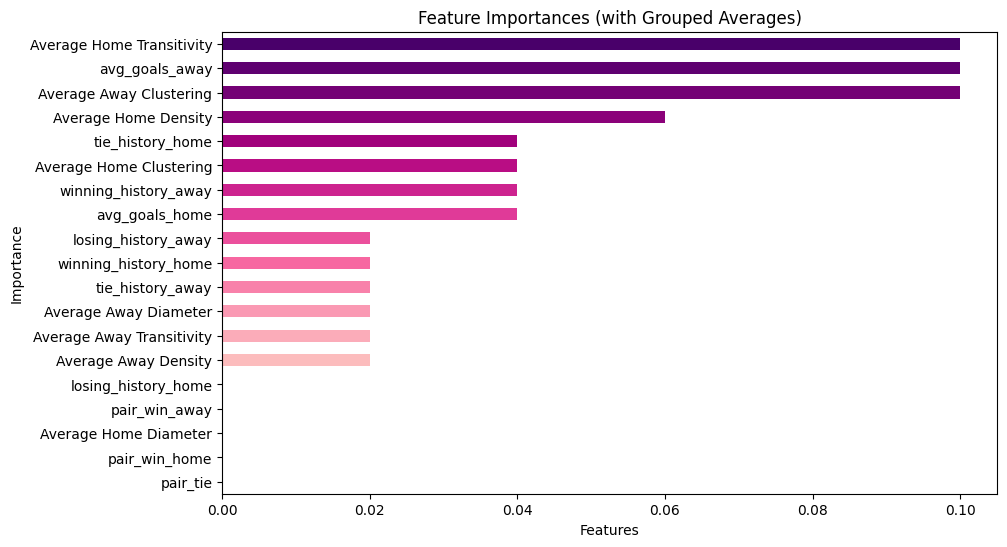

In [ ]:
feature_importances = ada_boost.feature_importances_

importances = pd.Series(feature_importances, index=X_train.columns)

# I will group the characteristics so it is easier to understand
groups = {
    'Average Home Density': ['home_density_1', 'home_density_2', 'home_density_3'],
    'Average Home Transitivity': ['home_transitivity_1', 'home_transitivity_2', 'home_transitivity_3'],
    'Average Home Diameter': ['home_diameter_1', 'home_diameter_2', 'home_diameter_3'],
    'Average Home Clustering': ['home_average_clustering_1', 'home_average_clustering_2', 'home_average_clustering_3'],
    'Average Away Density': ['away_density_1', 'away_density_2', 'away_density_3'],
    'Average Away Transitivity': ['away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3'],
    'Average Away Diameter': ['away_diameter_1', 'away_diameter_2', 'away_diameter_3'],
    'Average Away Clustering': ['away_average_clustering_1', 'away_average_clustering_2', 'away_average_clustering_3']
}


max_importances = pd.Series({group: importances[features].max() for group, features in groups.items()})
remaining_features = importances.drop([feature for group in groups.values() for feature in group])
final_importances = pd.concat([max_importances, remaining_features])

# Sort the importances
sorted_importances = final_importances.sort_values(ascending=True)
colors = plt.cm.RdPu(np.linspace(0, 1, len(sorted_importances)))

# Plot
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color=colors)
plt.title('Feature Importances (with Grouped Averages)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


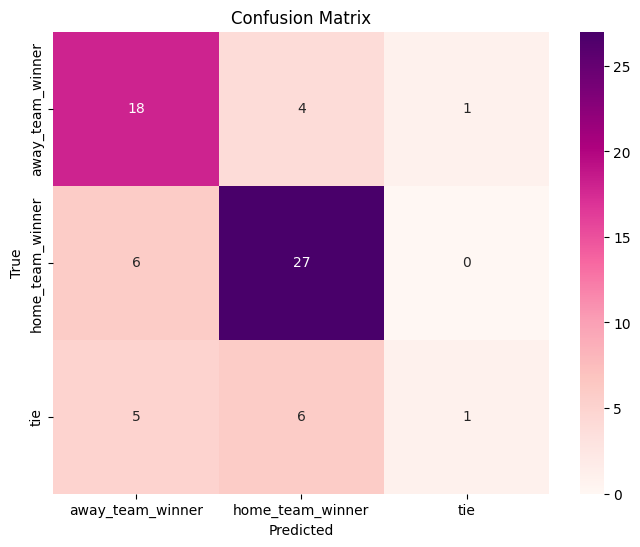

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion data matrix
conf_matrix_data = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='RdPu', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 35
[LightGBM] [Info] Start training from score -1.159159
[LightGBM] [Info] Start training from score -0.726187
[LightGBM] [Info] Start training from score -1.597015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [15, 31, 45, 60],
    'max_depth': [5, 10, 20, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 200],
    'reg_alfa': [0, 0.1, 0.5, 1, 1.5, 2]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7bafb012cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


Se truncaron las últimas líneas 5000 del resultado de transmisión.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm_optimized = LGBMClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=100,
    num_leaves=15,
    reg_alpha=0
)

lgbm_optimized.fit(X_train, y_train)

y_pred_optimized = lgbm_optimized.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_optimized))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 35
[LightGBM] [Info] Start training from score -1.159159
[LightGBM] [Info] Start training from score -0.726187
[LightGBM] [Info] Start training from score -1.597015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [ ]:
# We will use the default parameters since we get better results

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 35
[LightGBM] [Info] Start training from score -1.159159
[LightGBM] [Info] Start training from score -0.726187
[LightGBM] [Info] Start training from score -1.597015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

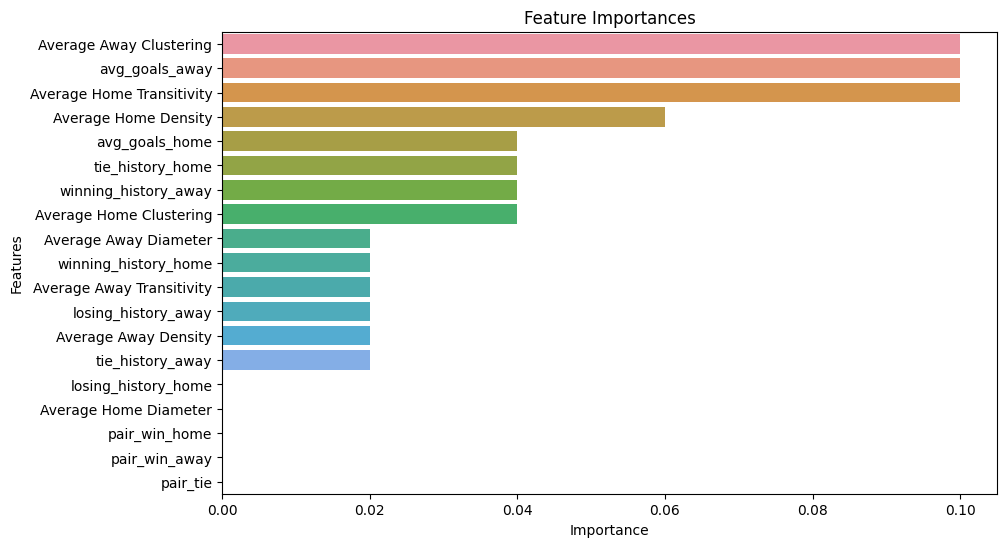

In [ ]:
# Feature importances
feature_importances_ = lgbm.feature_importances_
importances = pd.Series(feature_importances, index=X_train.columns)

# I will group the characteristics so it is easier to understand
groups = {
    'Average Home Density': ['home_density_1', 'home_density_2', 'home_density_3'],
    'Average Home Transitivity': ['home_transitivity_1', 'home_transitivity_2', 'home_transitivity_3'],
    'Average Home Diameter': ['home_diameter_1', 'home_diameter_2', 'home_diameter_3'],
    'Average Home Clustering': ['home_average_clustering_1', 'home_average_clustering_2', 'home_average_clustering_3'],
    'Average Away Density': ['away_density_1', 'away_density_2', 'away_density_3'],
    'Average Away Transitivity': ['away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3'],
    'Average Away Diameter': ['away_diameter_1', 'away_diameter_2', 'away_diameter_3'],
    'Average Away Clustering': ['away_average_clustering_1', 'away_average_clustering_2', 'away_average_clustering_3']
}

max_importances = pd.Series({group: importances[features].max() for group, features in groups.items()})
remaining_features = importances.drop([feature for group in groups.values() for feature in group])
final_importances = pd.concat([max_importances, remaining_features])

# Sort the importances
sorted_importances = final_importances.sort_values(ascending=False)
colors = plt.cm.RdPu(np.linspace(0, 1, len(sorted_importances)))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


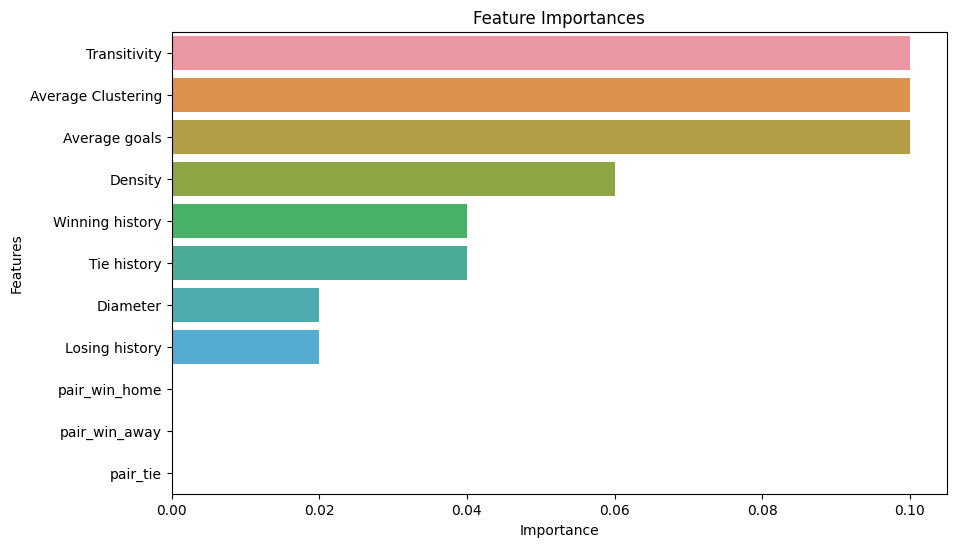

In [ ]:
# Feature importances
feature_importances_ = lgbm.feature_importances_
importances = pd.Series(feature_importances, index=X_train.columns)

# I will group the characteristics so it is easier to understand
groups = {
    'Density': ['home_density_1', 'home_density_2', 'home_density_3', 'away_density_1', 'away_density_2', 'away_density_3'],
    'Transitivity': ['home_transitivity_1', 'home_transitivity_2', 'home_transitivity_3','away_transitivity_1', 'away_transitivity_2', 'away_transitivity_3'],
    'Diameter': ['home_diameter_1', 'home_diameter_2', 'home_diameter_3','away_diameter_1', 'away_diameter_2', 'away_diameter_3'],
    'Average Clustering': ['home_average_clustering_1', 'home_average_clustering_2', 'home_average_clustering_3','away_average_clustering_1', 'away_average_clustering_2', 'away_average_clustering_3'],
    'Average goals':['avg_goals_home','avg_goals_away'],
    'Winning history': ['winning_history_home','winning_history_away'],
    'Losing history': ['losing_history_home','losing_history_away'],
    'Tie history': ['tie_history_home','tie_history_away'],

}

max_importances = pd.Series({group: importances[features].max() for group, features in groups.items()})
remaining_features = importances.drop([feature for group in groups.values() for feature in group])
final_importances = pd.concat([max_importances, remaining_features])

# Sort the importances
sorted_importances = final_importances.sort_values(ascending=False)
colors = plt.cm.RdPu(np.linspace(0, 1, len(sorted_importances)))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

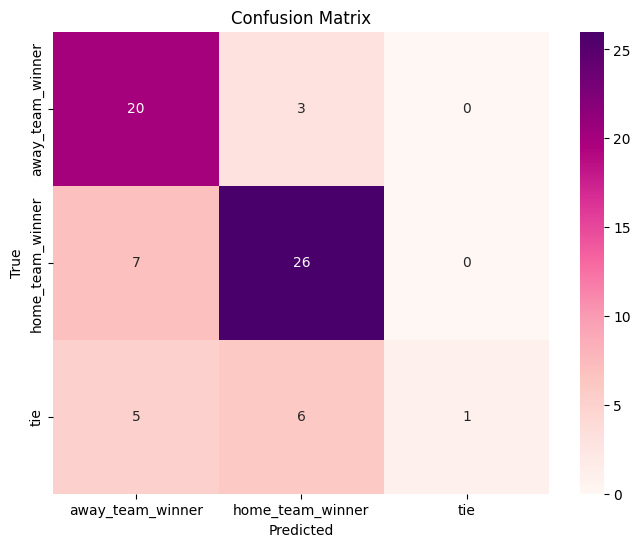

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion data matrix
conf_matrix_data = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='RdPu', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


In [ ]:
results_df

,Actual,Predicted
800,home_team_winner,away_team_winner
801,home_team_winner,home_team_winner
802,home_team_winner,home_team_winner
803,away_team_winner,away_team_winner
804,home_team_winner,home_team_winner
...,...,...
863,away_team_winner,home_team_winner
864,away_team_winner,away_team_winner
865,tie,home_team_winner
866,tie,away_team_winner


In [ ]:
df_to_merge=df_graph_properties.iloc[-68:,:3]
df_to_merge

,match_id,home_team,away_team
800,303666,Granada,Barcelona
801,303430,Barcelona,Villarreal
802,303473,Barcelona,Sevilla
803,303700,Eibar,Barcelona
804,303600,Barcelona,Real Valladolid
...,...,...,...
863,3773586,Barcelona,Granada
864,3773695,Valencia,Barcelona
865,3773372,Barcelona,Atlético Madrid
866,3773387,Levante UD,Barcelona


In [ ]:
predictions_df = pd.concat([df_to_merge, results_df], axis=1)
predictions_df

,match_id,home_team,away_team,Actual,Predicted
800,303666,Granada,Barcelona,home_team_winner,away_team_winner
801,303430,Barcelona,Villarreal,home_team_winner,home_team_winner
802,303473,Barcelona,Sevilla,home_team_winner,home_team_winner
803,303700,Eibar,Barcelona,away_team_winner,away_team_winner
804,303600,Barcelona,Real Valladolid,home_team_winner,home_team_winner
...,...,...,...,...,...
863,3773586,Barcelona,Granada,away_team_winner,home_team_winner
864,3773695,Valencia,Barcelona,away_team_winner,away_team_winner
865,3773372,Barcelona,Atlético Madrid,tie,home_team_winner
866,3773387,Levante UD,Barcelona,tie,away_team_winner


In [ ]:
predictions_df.to_csv('predictions_df.csv', index=False)

In [ ]:
matches = (predictions_df.iloc[:33]['Actual'] == predictions_df.iloc[:33]['Predicted']).sum()

print(f"In season 2019/2020 it made {matches} correct predictions out of 33")

In season 2019/2020 it made 23 correct predictions out of 33


In [ ]:
matches = (predictions_df.iloc[33:]['Actual'] == predictions_df.iloc[33:]['Predicted']).sum()

print(f"In season 2019/2020 it made {matches} correct predictions out of 33")

In season 2019/2020 it made 24 correct predictions out of 33


In [ ]:
predictions_df = pd.read_csv('/content/drive/Shareddrives/Ceci y Vale/RCEL 506/Código/Archivos csv/predictions_df.csv')

In [ ]:
predictions_df

,match_id,home_team,away_team,Actual,Predicted
0,303666,Granada,Barcelona,home_team_winner,away_team_winner
1,303430,Barcelona,Villarreal,home_team_winner,home_team_winner
2,303473,Barcelona,Sevilla,home_team_winner,home_team_winner
3,303700,Eibar,Barcelona,away_team_winner,away_team_winner
4,303600,Barcelona,Real Valladolid,home_team_winner,home_team_winner
...,...,...,...,...,...
63,3773586,Barcelona,Granada,away_team_winner,home_team_winner
64,3773695,Valencia,Barcelona,away_team_winner,away_team_winner
65,3773372,Barcelona,Atlético Madrid,tie,home_team_winner
66,3773387,Levante UD,Barcelona,tie,away_team_winner


In [ ]:
not_predicted = predictions_df[predictions_df['Actual'] != predictions_df['Predicted']]
not_predicted


,match_id,home_team,away_team,Actual,Predicted
0,303666,Granada,Barcelona,home_team_winner,away_team_winner
5,303504,Levante UD,Barcelona,home_team_winner,away_team_winner
10,303664,Real Sociedad,Barcelona,tie,away_team_winner
11,303596,Barcelona,Real Madrid,tie,home_team_winner
13,303652,Espanyol,Barcelona,tie,away_team_winner
15,303400,Valencia,Barcelona,home_team_winner,away_team_winner
20,303470,Real Madrid,Barcelona,home_team_winner,away_team_winner
24,303674,Sevilla,Barcelona,tie,away_team_winner
27,303696,Barcelona,Atlético Madrid,tie,home_team_winner
31,303634,Barcelona,Osasuna,away_team_winner,home_team_winner
